 # **TP06:CNN Réseaux de Neurones convolutifs**
### **I-Partie 1 Reconnaissance de chiffres(handwritten digit recognition)**
Utiliser les memes données du TP05 pour la reconnaissance des chiffres mais maintenant appliquer les réseaux de neuronnes convolutifs

In [1]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dropout,Dense
from keras.layers.pooling import MaxPooling2D
from tensorflow.keras.utils import to_categorical

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### 1-**Dataset**
Les données sont celles de la base MNIST déjà rencontrée dans le TP05. On rappelle brièvement que cette base contient 60 000 données d’apprentissage (et 10 000
données de test) sous la forme d’images 28 × 28 en niveau de gris, étiquetées par le chiffre attendu.

Pour le besoin de la convolution, on conserve chaque image sous la forme d’un tableau 28 × 28; afin de
préciser que l’image est en niveau de gris, la taille du tableau numpy est en fait (28, 28, 1) (à comparer à la
représentation d’une image couleur de taille (28, 28, 3)).

**Q1**-Importer les données, Redimensioner et normaliser les données

In [3]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [4]:
x_train = x_train / 255.0
x_test = x_test / 255.0

x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

In [5]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

**Q2-** Créez un réseaux de neuronnes convolutifs qui se compose de:

**1-Première couche de convolution.** Une couche formée de 32 sous-couches de convolution. Si on note A
l’image de départ, chaque sous-couche est la convolution $A * M_i$ de A par un motif $M_i$ de taille 3 × 3
(i = 1, . . . , 32). Une entrée de taille (28, 28, 1) est transformée en une sortie de taille (28, 28, 32).

**2-Seconde couche de convolution.** Une couche formée de 16 sous-couches de convolution. Si on note
B = (B1, . . . , B32) les sorties de la couche précédente, qui deviennent maintenant les entrées, alors chaque
sous-couche de sortie est une convolution $B* M_i'$
par un motif $M_i'$ de taille 3 × 3 × 32. Une entrée de taille (28, 28, 32) est transformée en une sortie de taille (28, 28, 16).

**3-Aplatissement.**  Chaque sortie de taille (28, 28, 16) est reformatée en un (grand) vecteur de taille 12 544
(= 28 × 28 × 16).

**4-Couche dense.**  C’est une couche « à l’ancienne » composée de 10 neurones, chaque neurone étant relié
aux 12 544 entrées. En tenant compte d’un biais par neurone cela fait 125 450 (= (12 544 + 1) × 10)
poids pour cette couche.



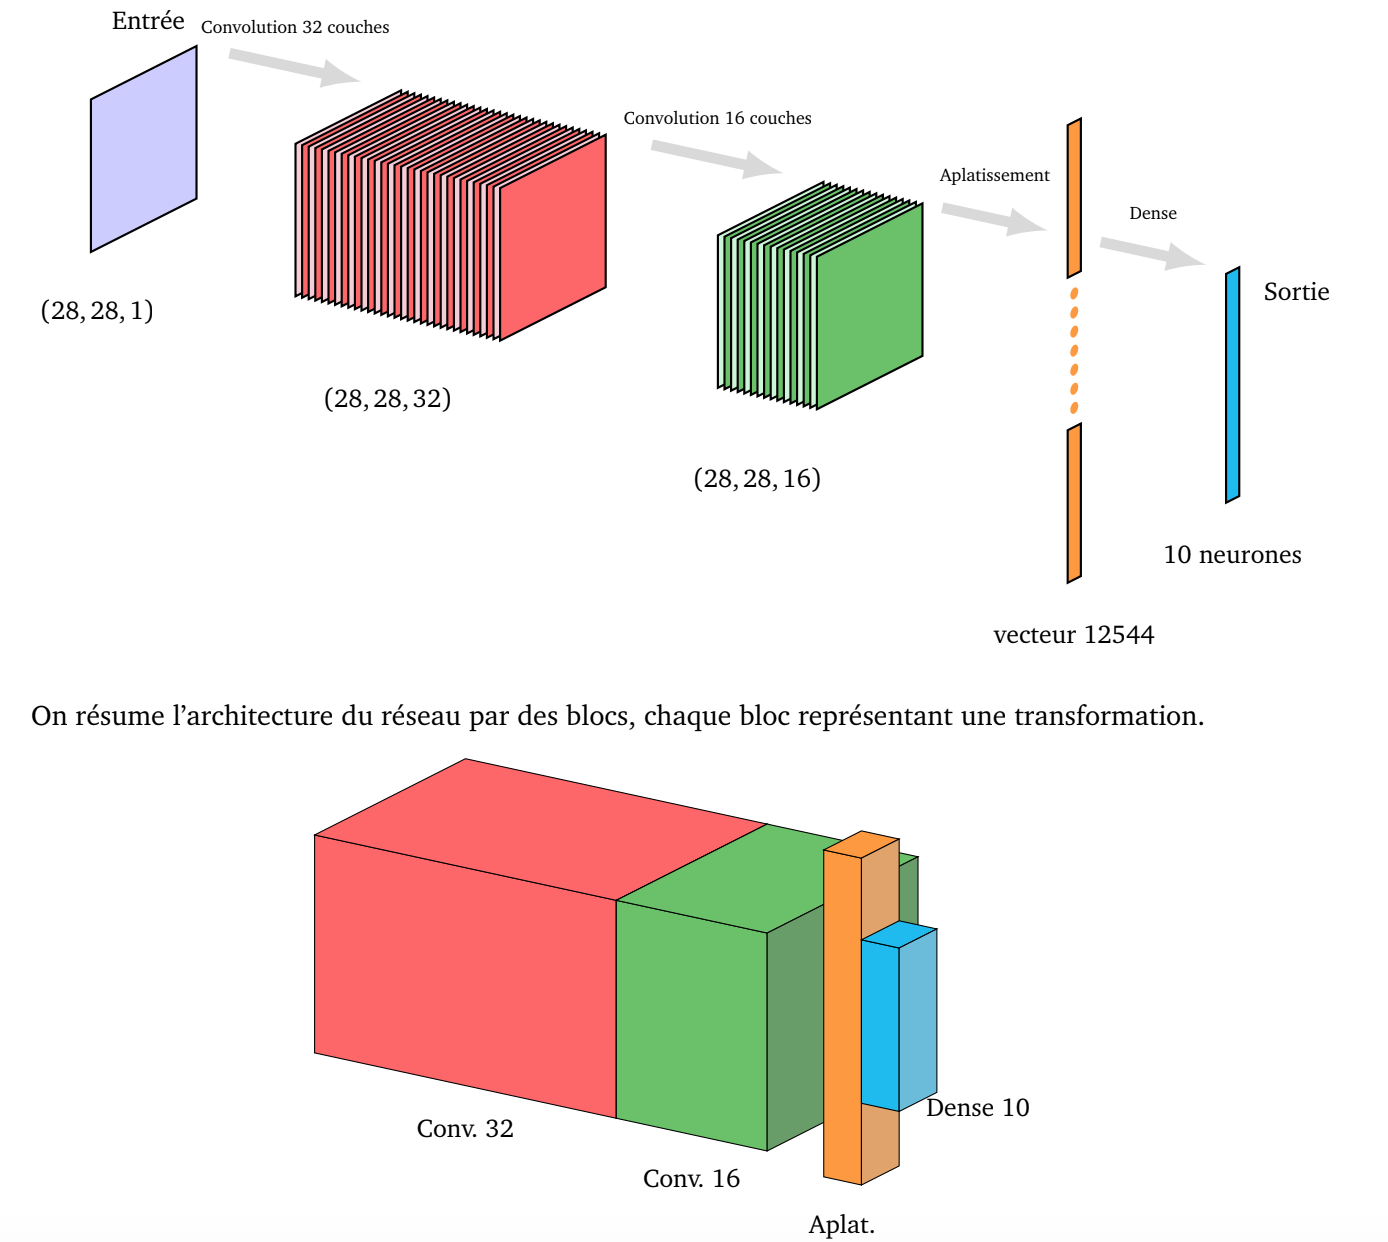

In [6]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3), input_shape=(28,28,1), padding='same', activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(16,kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.25))

model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7

**Q3-**Entrainer et Evaluer le modèle

In [7]:
model.fit(x_train,y_train, batch_size=64,epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
938/938 [==============================] - 55s 58ms/step - loss: 0.2632 - accuracy: 0.9213 - val_loss: 0.0808 - val_accuracy: 0.9735
Epoch 2/5
938/938 [==============================] - 42s 45ms/step - loss: 0.0807 - accuracy: 0.9756 - val_loss: 0.0577 - val_accuracy: 0.9804
Epoch 3/5
938/938 [==============================] - 41s 43ms/step - loss: 0.0610 - accuracy: 0.9804 - val_loss: 0.0440 - val_accuracy: 0.9851
Epoch 4/5
938/938 [==============================] - 42s 44ms/step - loss: 0.0506 - accuracy: 0.9840 - val_loss: 0.0416 - val_accuracy: 0.9863
Epoch 5/5
938/938 [==============================] - 41s 43ms/step - loss: 0.0440 - accuracy: 0.9865 - val_loss: 0.0433 - val_accuracy: 0.9855


In [17]:
score = model.evaluate(x_test, y_test)
print('validation loss :', score[0])
print('validation accuracy :',score[1])

313/313 [==============================] - 2s 7ms/step - loss: 0.0433 - accuracy: 0.9855
validation loss : 0.04329189285635948
validation accuracy : 0.9854999780654907


**Q4-Prévision** Afficher les résultats prédits des 10 premières images du data test et comparer les résultas avec ANN

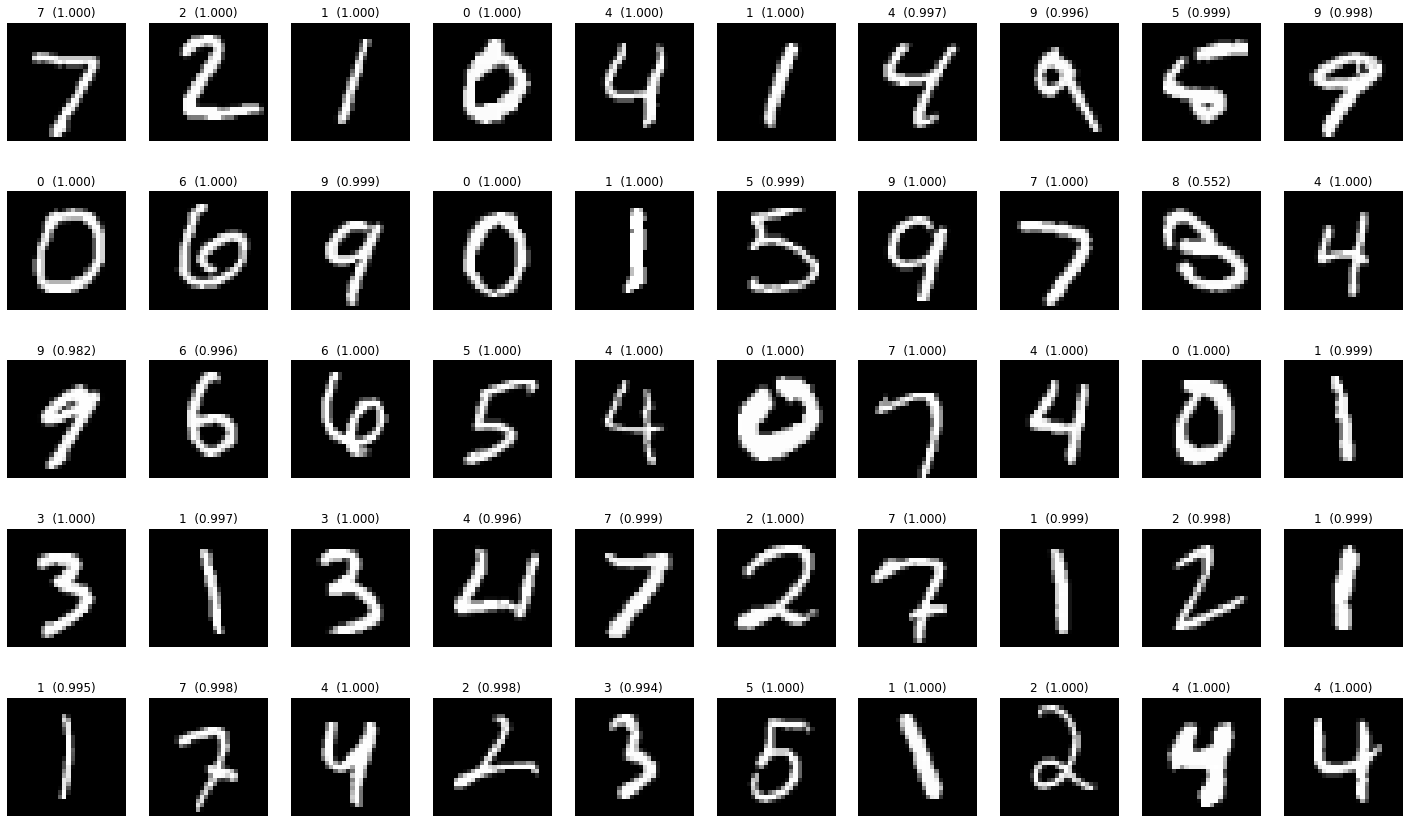

In [20]:
predictions = model.predict(x_test)

plt.figure(figsize=(25,15))
for i in range(50):
  plt.subplot(5,10,i+1)
  plt.imshow(x_test[i].reshape(28,28), cmap='gray')
  pred = predictions[i].argmax()
  p = predictions[i].max()
  plt.title('{}  ({:.3f})'.format(pred, p))
  plt.axis('off')
plt.show()

## **II-Partie-2: Reconnaissance image:ANN**
Nous souhaitons reconnaître des petites images et les classer selon 10 catégories.

**1-Dataset**

La base CIFAR-10 contient 60 000 petites images de 10 types différents.

Il y a 50 000 images pour l’apprentissage et 10 000 pour les tests.
• Chaque image est de taille 32 × 32 pixels en couleur. Un pixel couleur est codé par trois entiers (r, g, b)
compris entre 0 et 255. Une image est donc composée de 32 × 32 × 3 nombres.

• Chaque image appartient à une des dix catégories suivantes : avion, auto, oiseau, chat, biche, chien,
grenouille, cheval, bateau et camion.

Q1-Importer les données

In [3]:
from keras.datasets import cifar10

In [4]:
(X_train,Y_train),(X_test,Y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 6s 0us/step


**Q_2**  les catégories d'imaages sont labels = ['airplane','automobile','bird','cat','deer',
'dog','frog','horse','ship','truck']

Redimensionner Y et normaliser X

In [5]:
labels = ['airplane','automobile','bird','cat','deer', 'dog','frog','horse','ship','truck']

**Q3-** Afficher 10 images avec leurs label

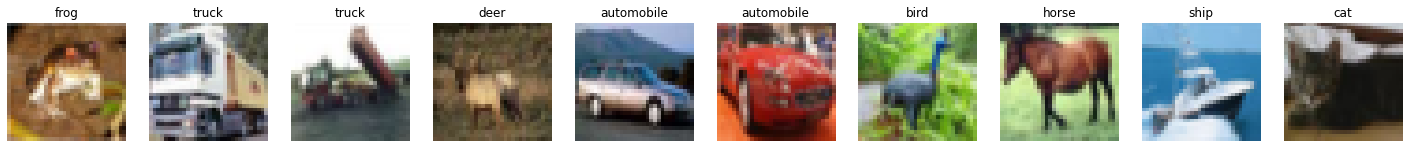

In [47]:
plt.figure(figsize=(25,7))
for i in range(10):
  plt.subplot(1,10,i+1)
  plt.imshow(X_train[i])
  index = Y_train[i][0]
  plt.title(labels[index])
  plt.axis('off')
plt.show()

**Q_4** Entrainer le modèle en utilisant ANN
 Les quatres premières couches sont composées chacune de p = 30 neurones ( Fonction d'activation sigmoid). La couche de sortie (est formée de 10 neurones, un pour chacun des chiffres. ( Fonction d'activation softmax)

In [6]:
input_dim = 32*32*3

Y_train = to_categorical(Y_train, dtype='int')
Y_test = to_categorical(Y_test, dtype='int')

X_train_reshape = X_train.reshape(-1,32*32*3)
X_test_reshape = X_test.reshape(-1,32*32*3)

X_train_reshape = X_train_reshape/255.0
X_test_reshape = X_test_reshape/255.0

In [36]:

ann_cifar_model = Sequential([
        Dense(30, activation='sigmoid', input_dim=input_dim),
        Dense(30, activation='sigmoid'),
        Dense(30, activation='sigmoid'),
        Dense(30, activation='sigmoid'),

        Dense(10, activation='softmax')
])

In [37]:
ann_cifar_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
ann_cifar_model.fit(X_train_reshape,Y_train, batch_size=256,epochs=10, validation_data=(X_test_reshape, Y_test))

Epoch 1/10
196/196 [==============================] - 2s 6ms/step - loss: 2.3063 - accuracy: 0.1170 - val_loss: 2.2840 - val_accuracy: 0.1572
Epoch 2/10
196/196 [==============================] - 1s 6ms/step - loss: 2.1755 - accuracy: 0.1693 - val_loss: 2.0878 - val_accuracy: 0.1905
Epoch 3/10
196/196 [==============================] - 1s 5ms/step - loss: 2.0630 - accuracy: 0.1943 - val_loss: 2.0431 - val_accuracy: 0.1903
Epoch 4/10
196/196 [==============================] - 1s 5ms/step - loss: 2.0318 - accuracy: 0.2018 - val_loss: 2.0234 - val_accuracy: 0.2029
Epoch 5/10
196/196 [==============================] - 1s 6ms/step - loss: 2.0175 - accuracy: 0.2057 - val_loss: 2.0415 - val_accuracy: 0.1973
Epoch 6/10
196/196 [==============================] - 1s 6ms/step - loss: 2.0065 - accuracy: 0.2071 - val_loss: 1.9956 - val_accuracy: 0.2103
Epoch 7/10
196/196 [==============================] - 1s 5ms/step - loss: 1.9897 - accuracy: 0.2145 - val_loss: 1.9832 - val_accuracy: 0.2256
Epoch 

**Q5- Prévision** 

Faites la reconnaissance de 10 images et afficher ces images

In [38]:
ann_score = ann_cifar_model.evaluate(X_test_reshape)
ann_score

313/313 [==============================] - 1s 2ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00


[0.0, 0.0]

In [39]:
predictions = ann_cifar_model.predict(X_test_reshape)

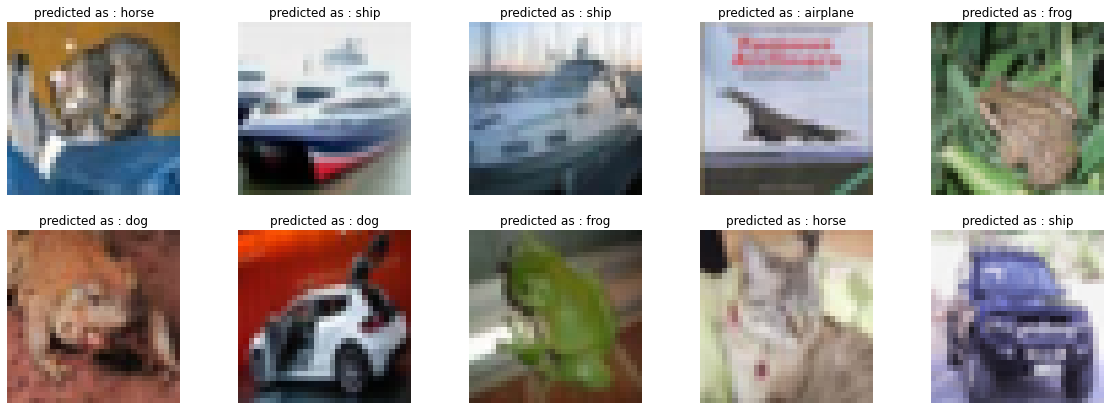

In [40]:
plt.figure(figsize=(20,7))
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(X_test[i])
  index = predictions[i].argmax()
  plt.title('predicted as : {}'.format(labels[index]))
  plt.axis('off')
plt.show()

# **Reconnaissance image** **CNN**

En utlisant le meme exemple dernier, appliquer maintenat CNN.

L’architecture du réseau utilisé est composée de plusieurs couches de convolution. Pour diminuer le nombre
de poids à calculer, on intercale des couches de pooling (regroupement de termes). Ces pooling sont des
max-pooling de taille 2 × 2.

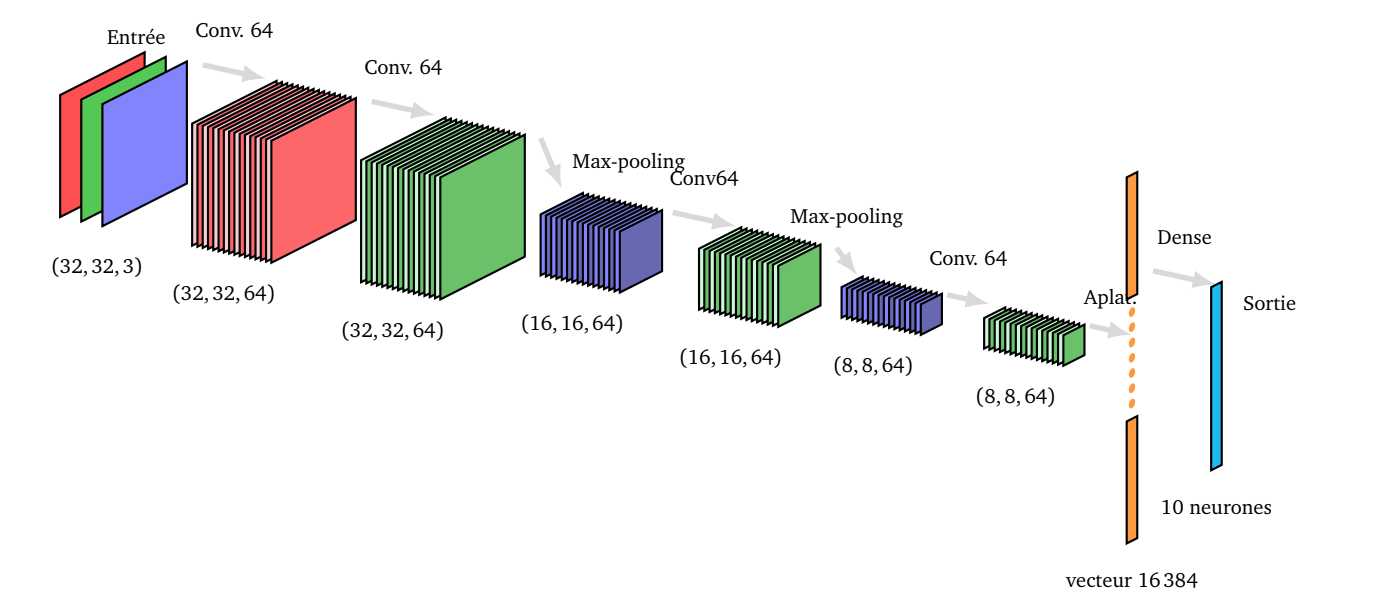

**Entrainement du modèle**

In [20]:
cifar_model = Sequential([
                    Conv2D(64, (3,3), padding='same', input_shape=(32,32,3)),
                    Conv2D(64, (3,3), padding='same', activation='relu'),
                    MaxPooling2D((2,2)),
                    Conv2D(64, (3,3), padding='same', activation='relu'),
                    MaxPooling2D((2,2)),
                    Conv2D(64, (3,3), padding='same', activation='relu'),
                    Flatten(),
                    Dense(256),
                    Dropout(0.25),
                    Dense(10, activation='softmax')
                  ])

In [21]:
cifar_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [22]:
cifar_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 64)        1792      
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 8, 8, 64)         

In [30]:
cifar_model.fit(X_train,Y_train, batch_size=128,epochs=10, validation_data=(X_test, Y_test))

Epoch 1/10
391/391 [==============================] - 6s 16ms/step - loss: 0.7004 - accuracy: 0.7559 - val_loss: 0.9624 - val_accuracy: 0.6841
Epoch 2/10
391/391 [==============================] - 6s 15ms/step - loss: 0.6704 - accuracy: 0.7665 - val_loss: 0.9730 - val_accuracy: 0.6842
Epoch 3/10
391/391 [==============================] - 6s 15ms/step - loss: 0.6277 - accuracy: 0.7813 - val_loss: 0.9919 - val_accuracy: 0.6810
Epoch 4/10
391/391 [==============================] - 6s 15ms/step - loss: 0.5916 - accuracy: 0.7911 - val_loss: 0.9827 - val_accuracy: 0.6962
Epoch 5/10
391/391 [==============================] - 6s 15ms/step - loss: 0.5620 - accuracy: 0.8048 - val_loss: 1.0472 - val_accuracy: 0.6879
Epoch 6/10
391/391 [==============================] - 6s 16ms/step - loss: 0.5311 - accuracy: 0.8105 - val_loss: 1.0413 - val_accuracy: 0.6920
Epoch 7/10
391/391 [==============================] - 6s 15ms/step - loss: 0.5037 - accuracy: 0.8222 - val_loss: 1.1753 - val_accuracy: 0.6636

**Prévision et Evaluation du modèle** 

In [31]:
cnn_score = cifar_model.evaluate(X_test, Y_test)
cnn_score

313/313 [==============================] - 1s 4ms/step - loss: 1.1391 - accuracy: 0.6882


[1.1390920877456665, 0.6881999969482422]

In [32]:
predictions = cifar_model.predict(X_test)

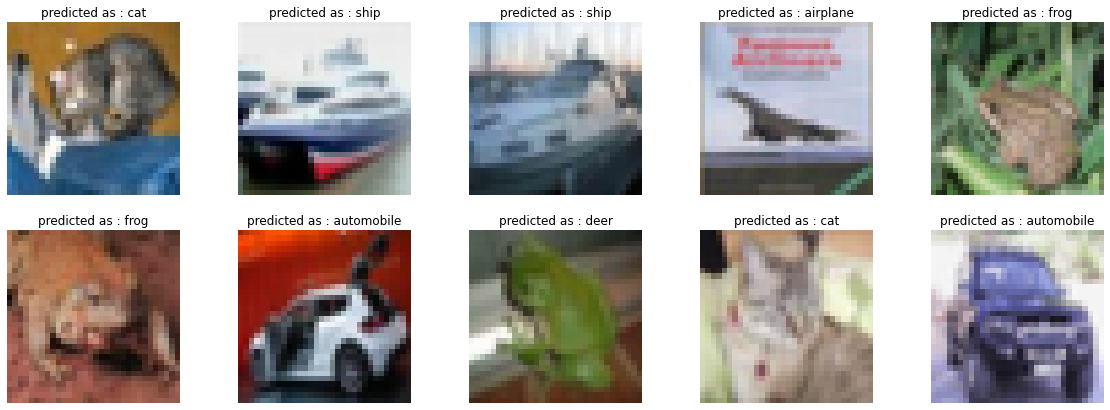

In [33]:
plt.figure(figsize=(20,7))
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(X_test[i])
  index = predictions[i].argmax()
  plt.title('predicted as : {}'.format(labels[index]))
  plt.axis('off')
plt.show()

**Conclusion:Comparer le résultats avec ANN**

In [42]:
print('************** ANN Model ***************')
print('- for 10 epochs:')
print('\t loss = ',ann_score[0])
print('\t accuracy = ',ann_score[1])

************** ANN Model ***************
- for 10 epochs:
	 loss =  0.0
	 accuracy =  0.0


In [43]:
print('************** CNN Model ***************')
print('- for 10 epochs:')
print('\t loss = ',cnn_score[0])
print('\t accuracy = ',cnn_score[1])

************** CNN Model ***************
- for 10 epochs:
	 loss =  1.1390920877456665
	 accuracy =  0.6881999969482422


# **Partie III: Denoising Images using CNN**

Dans cette partie, L'objectif est débruiter des images bruités importer de la MNIST en utilisant CNN.

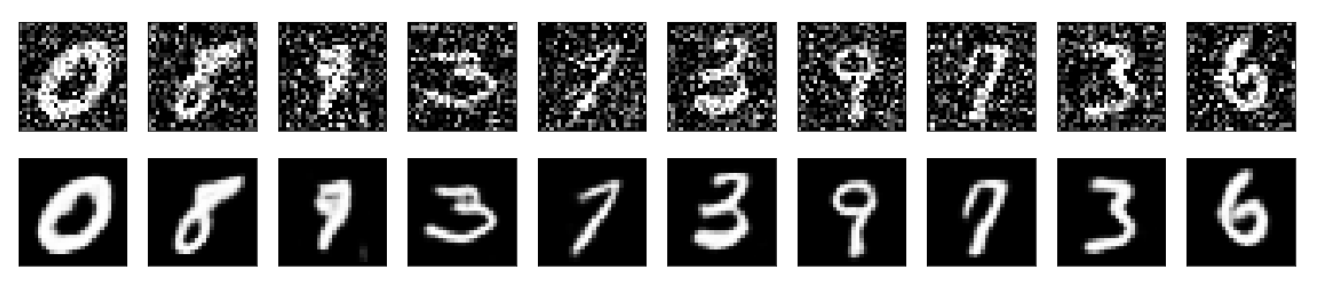

In [66]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(-1,28*28)
x_test = x_test.reshape(-1,28*28)

x_train = x_train / 255.0
x_test = x_test / 255.0

In [67]:
noise_factor = 0.25

x_train_noisy = x_train + noise_factor * np.random.normal(size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

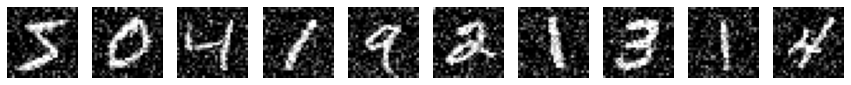

In [68]:
plt.figure(figsize=(15,5))
for i in range(10):
  plt.subplot(1,10,i+1)
  plt.imshow(x_train_noisy[i].reshape(28,28), cmap='gray')
  plt.axis('off')
plt.show()

In [75]:
noise_model = Sequential()
noise_model.add(Dense(500, input_dim=28*28, activation='relu'))
noise_model.add(Dense(300, activation='relu'))
noise_model.add(Dense(200, activation='relu'))
noise_model.add(Dense(784, activation='sigmoid'))

noise_model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [76]:
noise_model.fit(x_train_noisy, x_train, validation_data=(x_test_noisy, x_test), epochs=5, batch_size=512)

Epoch 1/5
118/118 [==============================] - 1s 8ms/step - loss: 0.0642 - accuracy: 0.0101 - val_loss: 0.0334 - val_accuracy: 0.0111
Epoch 2/5
118/118 [==============================] - 1s 6ms/step - loss: 0.0260 - accuracy: 0.0106 - val_loss: 0.0205 - val_accuracy: 0.0100
Epoch 3/5
118/118 [==============================] - 1s 6ms/step - loss: 0.0184 - accuracy: 0.0119 - val_loss: 0.0162 - val_accuracy: 0.0140
Epoch 4/5
118/118 [==============================] - 1s 6ms/step - loss: 0.0150 - accuracy: 0.0125 - val_loss: 0.0138 - val_accuracy: 0.0115
Epoch 5/5
118/118 [==============================] - 1s 6ms/step - loss: 0.0132 - accuracy: 0.0124 - val_loss: 0.0123 - val_accuracy: 0.0094


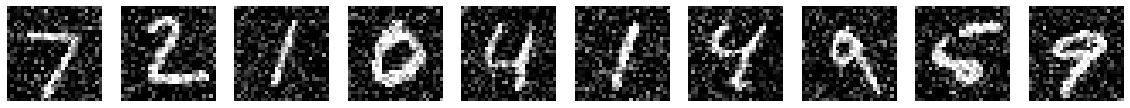

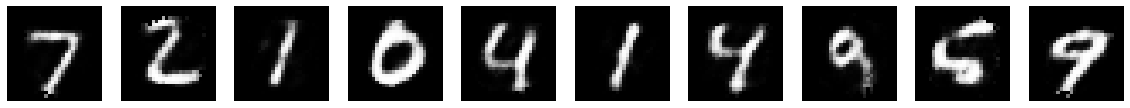

In [83]:
pred = noise_model.predict(x_test_noisy)

plt.figure(figsize=(20,8))
for i in range(10):
  plt.subplot(1,10,i+1)
  plt.imshow(x_test_noisy[i].reshape(28,28), cmap='gray')
  plt.axis('off')
plt.show()

plt.figure(figsize=(20,8))
for i in range(10):
  plt.subplot(1,10,i+1)
  plt.imshow(pred[i].reshape(28,28), cmap='gray')
  plt.axis('off')
plt.show()

                                      Abdelghafour Bamoula